## NumPy模拟:正态随机漫步理论

In [3]:
# 使用内置random模块
import random
# random模块的normalvariate(mu,sigma)方法可以生成符合正态分布的随机数， 其中mu, sigma分别对应公式中的期望值μ, 标准差σ，当mu=0, sigma=1为标准正态分布
print("normalvariate: ",random.normalvariate(0,1))

normalvariate:  -0.7896725511134037


walk前10:[0.5914127598786401, -0.0935843137368795, 0.4538061551795134, -0.8322806835655449, 0.35054982179369404, 2.364235482611065, 0.05428208817167591, -0.20635206356967944, 0.18802511678, 0.3603701002597986]


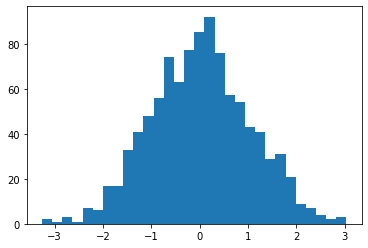

In [8]:
# 循环产生多个随机数，使用matplotlib绘制直方图
walk = []
for _ in range(1000):
    walk.append(random.normalvariate(0,1))
print(f"walk前10:{walk[:10]}")

import matplotlib.pyplot as plt
plt.hist(walk, bins=30) # bins直方图的柱数
plt.show()

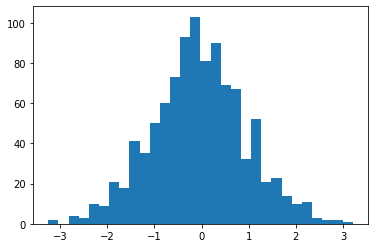

In [9]:
# 使用numpy的random模块
# loc、scale分别对应公式中的期望值μ，标准差σ，默认呈标准正态分布(μ=0,σ=1)，size指输出的值的数量，默认为None时只输出一个值
import numpy as np
import matplotlib.pyplot as plt#导入模块
plt.hist(np.random.normal(loc=0.0, scale=1.0, size=1000), bins=30)#bins直方图的柱数
plt.show()

In [12]:
# 矢量运算的能力
stock_data = np.random.normal(loc=10.0, scale=1.0, size=1000)
print("stock_data：\n {}".format(stock_data))

stock_data：
 [10.31171687 11.09938452 10.27989683 10.11903491  9.2448634   9.30882912
  9.66597067  8.59788129 10.79867811 10.04279709 11.07517245  9.0377445
  9.73748682 10.30413645  9.58944007 11.02570882 10.05663567 10.03074502
 11.17119216  9.25422802  8.80138178 10.59526004 10.92780441 10.73041498
  9.75214631 10.03873451 10.52167979  9.44441026  9.16774116 11.0925845
 10.92174512  9.90774942 10.03124452  9.90230959 10.06486143  9.44040388
 10.32076779 10.25117477  8.47396312 11.12183874 10.46997182  9.95657381
  9.34557726 10.28379404 10.31172567 10.04131006 11.26144103 11.55820022
 11.17540482 10.68541046  9.64279578  8.32823392  8.56771195  9.94562174
 10.91555779  8.76982221  9.83935689 10.49789944 11.95249158  9.54382158
  9.73868508 10.23825799 11.1725615   9.36730613 10.22060208  8.34379518
 10.09320126  8.991649    8.88586716 11.17188322  9.054979   10.78251711
 11.55196555  8.5595767   9.70845819 10.22029925  8.42183531  9.17445137
 10.07283474  9.71986396  9.86578394  8.

In [14]:
# 我们规整化所有浮点型随机数据的精度，以便于后续显示和运算。此处使用np.around()方法将所有数据保留2位小数，由于矢量运算的能力，此处仅需一行代码就可实现
stock_data = np.around(stock_data,2)#保留2位小数
print("stock_data：\n {}".format(stock_data))

stock_data：
 [10.31 11.1  10.28 10.12  9.24  9.31  9.67  8.6  10.8  10.04 11.08  9.04
  9.74 10.3   9.59 11.03 10.06 10.03 11.17  9.25  8.8  10.6  10.93 10.73
  9.75 10.04 10.52  9.44  9.17 11.09 10.92  9.91 10.03  9.9  10.06  9.44
 10.32 10.25  8.47 11.12 10.47  9.96  9.35 10.28 10.31 10.04 11.26 11.56
 11.18 10.69  9.64  8.33  8.57  9.95 10.92  8.77  9.84 10.5  11.95  9.54
  9.74 10.24 11.17  9.37 10.22  8.34 10.09  8.99  8.89 11.17  9.05 10.78
 11.55  8.56  9.71 10.22  8.42  9.17 10.07  9.72  9.87  8.82 10.31  8.76
 11.24 10.21 10.88  9.45  9.43  9.48  9.79  8.77 12.59 10.11 10.46  9.57
 10.55 10.26 11.69  9.79 11.84  9.    9.03 11.83 11.5  10.97  8.97 10.32
 10.17  8.82 10.83  9.53 10.75  9.94  9.09 10.12  8.29  9.79 10.67 11.44
  8.97 11.51  9.92  7.97  9.32 10.75  8.78  8.98  9.19  8.24 10.46  8.36
  9.41 10.   10.36 11.23  9.64 10.56 11.06  9.24  8.78 11.05 10.02 10.37
 11.61 10.43  9.46 11.5   9.77 10.72 10.49 10.71 11.94  9.65  9.29  8.97
  9.77  9.66  9.32 10.52 10.08 11.54  

In [15]:
# 算数运算：计算股价的涨跌幅 (今日收盘价-昨日收盘价)/昨日收盘价*100%
# np.roll()为循环右移，此处将今日收盘价数组循环右移一位得到了昨日收盘价数组，那么昨日收盘价数组第一个值为无效值，对应计算得到的pct_change的第一个值需要设置为无效值np.nan
pct_change = np.around((stock_data - np.roll(stock_data,1))/np.roll(stock_data,1),2)
pct_change[0] = np.nan
print("pct_change：\n {}".format(pct_change))

pct_change：
 [  nan  0.08 -0.07 -0.02 -0.09  0.01  0.04 -0.11  0.26 -0.07  0.1  -0.18
  0.08  0.06 -0.07  0.15 -0.09 -0.    0.11 -0.17 -0.05  0.2   0.03 -0.02
 -0.09  0.03  0.05 -0.1  -0.03  0.21 -0.02 -0.09  0.01 -0.01  0.02 -0.06
  0.09 -0.01 -0.17  0.31 -0.06 -0.05 -0.06  0.1   0.   -0.03  0.12  0.03
 -0.03 -0.04 -0.1  -0.14  0.03  0.16  0.1  -0.2   0.12  0.07  0.14 -0.2
  0.02  0.05  0.09 -0.16  0.09 -0.18  0.21 -0.11 -0.01  0.26 -0.19  0.19
  0.07 -0.26  0.13  0.05 -0.18  0.09  0.1  -0.03  0.02 -0.11  0.17 -0.15
  0.28 -0.09  0.07 -0.13 -0.    0.01  0.03 -0.1   0.44 -0.2   0.03 -0.09
  0.1  -0.03  0.14 -0.16  0.21 -0.24  0.    0.31 -0.03 -0.05 -0.18  0.15
 -0.01 -0.13  0.23 -0.12  0.13 -0.08 -0.09  0.11 -0.18  0.18  0.09  0.07
 -0.22  0.28 -0.14 -0.2   0.17  0.15 -0.18  0.02  0.02 -0.1   0.27 -0.2
  0.13  0.06  0.04  0.08 -0.14  0.1   0.05 -0.16 -0.05  0.26 -0.09  0.03
  0.12 -0.1  -0.09  0.22 -0.15  0.1  -0.02  0.02  0.11 -0.19 -0.04 -0.03
  0.09 -0.01 -0.04  0.13 -0.04  0.14 -0.

## Pandas构建DataFrame股票数据

In [18]:
import pandas as pd
#生成日时间序列
dd=pd.date_range('2019-01-01',freq='D',periods=1000)
print(f'生成日时间序列：\n{dd}')

生成日时间序列：
DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2021-09-17', '2021-09-18', '2021-09-19', '2021-09-20',
               '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-25', '2021-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')


In [19]:
df_stock = pd.DataFrame({'close': stock_data, 'price range': pct_change}, index=dd)
print(f'股价交易数据：\n {df_stock.head()}')#打印前5行数据

股价交易数据：
             close  price range
2019-01-01  10.31          NaN
2019-01-02  11.10         0.08
2019-01-03  10.28        -0.07
2019-01-04  10.12        -0.02
2019-01-05   9.24        -0.09


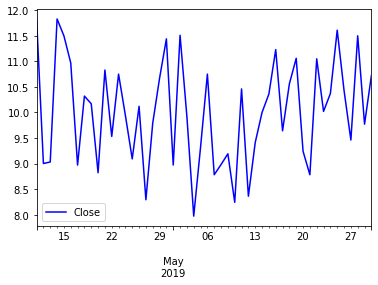

In [21]:
import matplotlib.pyplot as plt
# 绘制收盘价:50个交易日收盘价曲线,随机漫步的股价走势
df_stock.close[100:150].plot(c='b')
plt.legend(['Close'],loc='best')
plt.show()

## Matplotlib函数式绘图的方式

In [49]:
import numpy as np
x = np.linspace(0.5, 7.5, 1000)
y = np.sin(x)

In [50]:
import matplotlib.pyplot as plt
# 创建图形并设置大小
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

([<matplotlib.axis.YTick at 0x108791e80>,
 <a list of 3 Text yticklabel objects>)

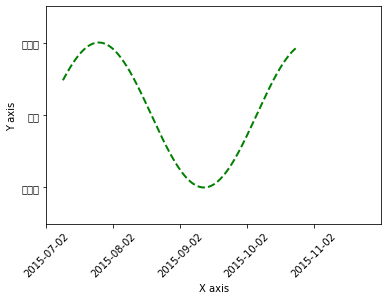

In [51]:
# lw：line width，用于设置线条宽度
# '--g'：结合linestyle和color，线条使用虚线，颜色使用绿色
# label：设置线条的标签为'sin(x)'
plt.plot(x, y, '--g', lw=2, label='sin(x)')
# 调整坐标轴刻度范围
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)
# 设置轴标签
plt.xlabel('X axis')
plt.ylabel('Y axis')
# 设置坐标轴标签
plt.xticks(np.arange(0,10,2),['2015-07-02','2015-08-02','2015-09-02','2015-10-02','2015-11-02'],\
                                        rotation=45)

# 中文解决方案
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# 
plt.yticks(np.arange(-1,1.5,1),[u'最小值',u'零值',u'最大值'])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


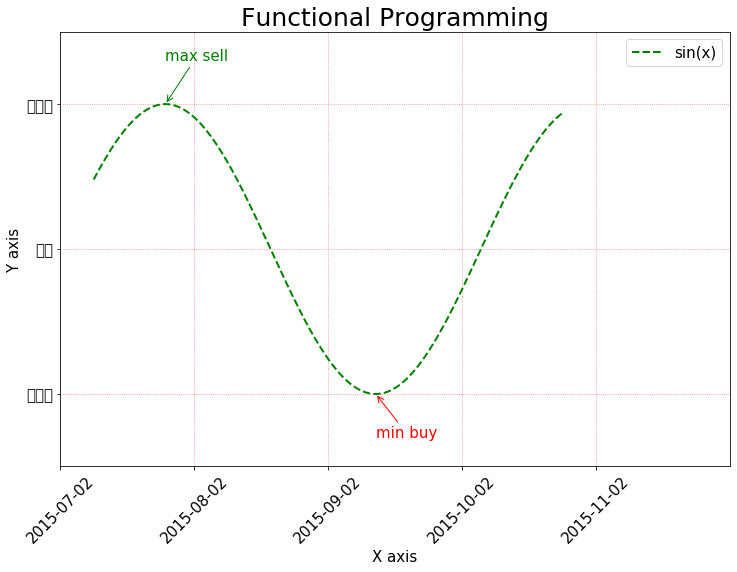

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
x = np.linspace(0.5, 7.5, 1000)
y = np.sin(x)

#函数式绘图
# 创建图形并设置大小
plt.figure(figsize=(12, 8))

# sin(x)图
plt.plot(x, y, '--g', lw=2, label='sin(x)')

# 调整坐标轴范围
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)
# 设置坐标轴标签
plt.xticks(np.arange(0,10,2),['2015-07-02','2015-08-02','2015-09-02','2015-10-02','2015-11-02'],\
                             rotation=45,fontsize=15)
plt.yticks(np.arange(-1,1.5,1),[u'最小值',u'零值',u'最大值'],fontsize=15)

# 设置轴标签
plt.xlabel('X axis',fontsize=15)
plt.ylabel('Y axis',fontsize=15)
# 设置网格线
plt.grid(True, ls=':', color='r', alpha=0.5)
# 设置标题
plt.title(u"Functional Programming",fontsize=25)
# 添加图例
plt.legend(loc='upper right',fontsize=15)

# 添加sin(x)的最高点注释
plt.annotate('max sell',
             xy = (np.pi/2, 1),#箭头指向点的坐标
             xytext = (np.pi/2, 1.3),#注释文本左端的坐标
             weight = 'regular',#注释文本的字体粗细风格，bold是粗体，regular是正常粗细
             color = 'g',#注释文本的颜色
             fontsize = 15,#注释文本的字体大小
             arrowprops = {
                 'arrowstyle': '->',#箭头类型
                 'connectionstyle': 'arc3',#连接类型
                 'color': 'g'#箭头颜色
             })

# 添加sin(x)的最低点注释
plt.annotate('min buy',
             xy = (np.pi*3/2, -1),
             xytext = (np.pi*3/2, -1.3),
             weight = 'regular',
             color = 'r',
             fontsize = 15,
             arrowprops = {
                 'arrowstyle': '->',
                 'connectionstyle': 'arc3',
                 'color': 'r'
             })
# 显示图形
plt.show()

## Matplotlib对象式绘图的方式

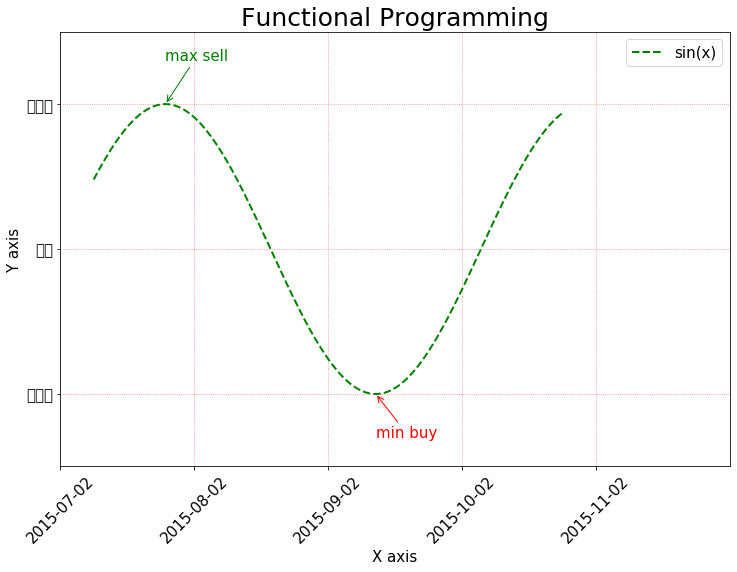

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
x = np.linspace(0.5, 7.5, 1000)
y = np.sin(x)
#pyplot模块中的figure()函数创建名为fig的Figure对象
fig = plt.figure(figsize=(12, 8))
#在Figure对象中创建一个Axes对象，每个Axes对象即为一个绘图区域
ax = fig.add_subplot(111)
# sin(x)图
ax.plot(x, y, '--g', lw=2, label='sin(x)')

# 调整坐标轴范围
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)
# 设置坐标轴标签
ax.set_xticks(np.arange(0,10,2))
ax.set_yticks(np.arange(-1,1.5,1))
ax.set_xticklabels(['2015-07-02','2015-08-02','2015-09-02','2015-10-02','2015-11-02'],\
                             rotation=45,fontsize=15)
ax.set_yticklabels([u'最小值',u'零值',u'最大值'],fontsize=15)

# 设置轴标签
ax.set_xlabel('X axis',fontsize=15)
ax.set_ylabel('Y axis',fontsize=15)
# 设置网格线
ax.grid(True, ls=':', color='r', alpha=0.5)
# 设置标题
ax.set_title(u"Functional Programming",fontsize=25)
# 添加图例
ax.legend(loc='upper right',fontsize=15)

# 添加sin(x)的最高点注释
ax.annotate('max sell',
             xy = (np.pi/2, 1),#箭头指向点的坐标
             xytext = (np.pi/2, 1.3),#注释文本左端的坐标
             weight = 'regular',#注释文本的字体粗细风格，bold是粗体，regular是正常粗细
             color = 'g',#注释文本的颜色
             fontsize = 15,#注释文本的字体大小
             arrowprops = {
                 'arrowstyle': '->',#箭头类型
                 'connectionstyle': 'arc3',#连接类型
                 'color': 'g'#箭头颜色
             })

# 添加sin(x)的最低点注释
ax.annotate('min buy',
             xy = (np.pi*3/2, -1),
             xytext = (np.pi*3/2, -1.3),
             weight = 'regular',
             color = 'r',
             fontsize = 15,
             arrowprops = {
                 'arrowstyle': '->',
                 'connectionstyle': 'arc3',
                 'color': 'r'
             })
# 显示图形
plt.show()

## 差异化分析常用股票交易数据接口

In [59]:
!pip install pandas_datareader
import pandas_datareader.data as web

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 112kB 2.9MB/s eta 0:00:01


In [63]:
import pandas_datareader.data as web
import datetime
#获取上证指数的2017.1.1日至今的交易数据
df_stockload = web.DataReader("000001.SS", "yahoo", datetime.datetime(2017,1,1), datetime.date.today())

print(df_stockload.head())  # 查看前几行

                   High          Low         Open        Close    Volume  \
Date                                                                       
2017-01-03  3136.456055  3105.309082  3105.309082  3135.920898  141600.0   
2017-01-04  3160.103027  3130.114990  3133.787109  3158.793945  167900.0   
2017-01-05  3168.501953  3154.281006  3157.906006  3165.410889  174700.0   
2017-01-06  3172.034912  3153.024902  3163.775879  3154.321045  183700.0   
2017-01-09  3173.135986  3147.735107  3148.531982  3171.236084  171700.0   

              Adj Close  
Date                     
2017-01-03  3135.920898  
2017-01-04  3158.793945  
2017-01-05  3165.410889  
2017-01-06  3154.321045  
2017-01-09  3171.236084  


In [64]:
print(df_stockload.tail())  # 查看末尾几行

                   High          Low         Open        Close        Volume  \
Date                                                                           
2019-12-31  3051.677002  3030.511963  3036.385986  3050.124023  2.174000e+05   
2020-01-02  3098.100098  3066.335938  3066.335938  3085.197998  2.925000e+05   
2020-01-03  3093.819092  3074.518066  3089.021973  3083.785889  2.615000e+05   
2020-01-06  3107.202881  3065.309082  3070.908936  3083.407959  3.126000e+05   
2020-01-07  3105.450684  3084.329102  3085.488281  3104.801514  1.888507e+09   

              Adj Close  
Date                     
2019-12-31  3050.124023  
2020-01-02  3085.197998  
2020-01-03  3083.785889  
2020-01-06  3083.407959  
2020-01-07  3104.801514  


In [65]:
print (df_stockload.columns)#查看列索引信息

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [66]:
print (df_stockload.index)#查看行索引信息

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-16',
               ...
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
               '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', name='Date', length=732, freq=None)


In [67]:
print(df_stockload.shape)#查看形状

(732, 6)


In [68]:
print (df_stockload.describe())#查看各列数据描述性统计

              High          Low         Open        Close        Volume  \
count   732.000000   732.000000   732.000000   732.000000  7.320000e+02   
mean   3053.308844  3017.803169  3035.045554  3037.808777  2.763315e+06   
std     249.132672   252.553152   250.865055   251.425105  6.979449e+07   
min    2488.479004  2440.906982  2446.019043  2464.363037  8.820000e+04   
25%    2892.052307  2857.733337  2874.713257  2879.528992  1.370000e+05   
50%    3096.653442  3053.059570  3072.990601  3080.852051  1.637500e+05   
75%    3254.188904  3227.813293  3240.228333  3244.564697  2.081000e+05   
max    3587.031982  3534.195068  3563.639893  3559.465088  1.888507e+09   

         Adj Close  
count   732.000000  
mean   3037.808777  
std     251.425105  
min    2464.363037  
25%    2879.528992  
50%    3080.852051  
75%    3244.564697  
max    3559.465088  


In [69]:
print(df_stockload.info())#查看缺失及每列数据类型

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 732 entries, 2017-01-03 to 2020-01-07
Data columns (total 6 columns):
High         732 non-null float64
Low          732 non-null float64
Open         732 non-null float64
Close        732 non-null float64
Volume       732 non-null float64
Adj Close    732 non-null float64
dtypes: float64(6)
memory usage: 40.0 KB
None


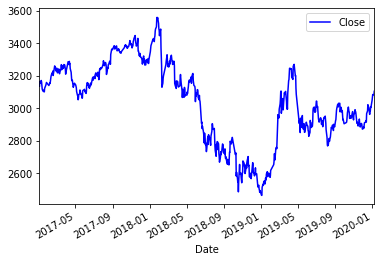

In [70]:
import matplotlib.pyplot as plt

#绘制收盘价
df_stockload.Close.plot(c='b')
plt.legend(['Close','30ave','60ave'],loc='best')
plt.show()

## Tushare 获取股票数据

In [71]:
import tushare as ts
df_sh=ts.get_hist_data('sh',start='2017-01-01',end=datetime.datetime.now().strftime('%Y-%m-%d'))
print(df_sh.info())#查看交易数据概览信息

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 2020-01-07 to 2017-07-10
Data columns (total 13 columns):
open            611 non-null float64
high            611 non-null float64
close           611 non-null float64
low             611 non-null float64
volume          611 non-null float64
price_change    611 non-null float64
p_change        611 non-null float64
ma5             611 non-null float64
ma10            611 non-null float64
ma20            611 non-null float64
v_ma5           611 non-null float64
v_ma10          611 non-null float64
v_ma20          611 non-null float64
dtypes: float64(13)
memory usage: 66.8+ KB
None


In [72]:
print(df_sh.axes)# 查看行和列的轴标签

[Index(['2020-01-07', '2020-01-06', '2020-01-03', '2020-01-02', '2019-12-31',
       '2019-12-30', '2019-12-27', '2019-12-26', '2019-12-25', '2019-12-24',
       ...
       '2017-07-21', '2017-07-20', '2017-07-19', '2017-07-18', '2017-07-17',
       '2017-07-14', '2017-07-13', '2017-07-12', '2017-07-11', '2017-07-10'],
      dtype='object', name='date', length=611), Index(['open', 'high', 'close', 'low', 'volume', 'price_change', 'p_change',
       'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20'],
      dtype='object')]


In [73]:
df_sh.index = pd.to_datetime(df_sh.index)
df_sh.sort_index(inplace=True)
print(df_sh.axes)# 查看行和列的轴标签

[DatetimeIndex(['2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21',
               ...
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
               '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', name='date', length=611, freq=None), Index(['open', 'high', 'close', 'low', 'volume', 'price_change', 'p_change',
       'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20'],
      dtype='object')]


In [75]:
#get_hist_data 未返回2008年数据
df_sh=ts.get_hist_data('sh',start='2018-01-01',end=datetime.datetime.now().strftime('%Y-%m-%d'))
print(df_sh.head())

               open     high    close      low      volume  price_change  \
date                                                                       
2020-01-07  3085.49  3105.45  3104.80  3084.33  2765831.00         21.39   
2020-01-06  3070.91  3107.20  3083.41  3065.31  3125758.50         -0.38   
2020-01-03  3089.02  3093.82  3083.79  3074.52  2614966.75         -1.41   
2020-01-02  3066.34  3098.10  3085.20  3066.34  2924702.00         35.08   
2019-12-31  3036.39  3051.68  3050.12  3030.51  2174290.25         10.10   

            p_change       ma5      ma10      ma20       v_ma5      v_ma10  \
date                                                                         
2020-01-07      0.69  3081.464  3042.429  3007.901  2721109.70  2376848.85   
2020-01-06     -0.01  3068.508  3028.224  2998.385  2664076.55  2305982.36   
2020-01-03     -0.05  3052.834  3020.377  2989.815  2533130.40  2208482.26   
2020-01-02      1.15  3037.546  3013.705  2980.599  2375017.90  2155609.85   

In [76]:
print(df_sh.tail())

               open     high    close      low      volume  price_change  \
date                                                                       
2018-01-08  3391.55  3412.73  3409.48  3384.56  2361651.00         17.73   
2018-01-05  3386.46  3402.07  3391.75  3380.25  2130606.75          6.04   
2018-01-04  3371.00  3392.83  3385.71  3365.30  2069552.88         16.60   
2018-01-03  3347.74  3379.92  3369.11  3345.29  2138361.50         20.78   
2018-01-02  3314.03  3349.05  3348.33  3314.03  2022788.62         41.16   

            p_change       ma5      ma10      ma20       v_ma5      v_ma10  \
date                                                                         
2018-01-08      0.52  3380.876  3337.029  3314.206  2144592.15  1841257.61   
2018-01-05      0.18  3360.414  3325.787  3308.231  1955435.63  1729139.84   
2018-01-04      0.49  3341.340  3316.618  3302.246  1880057.63  1658207.09   
2018-01-03      0.62  3319.354  3306.808  3297.659  1791496.83  1588996.91   

In [77]:
#get_k_data 返回2008年数据
df_sh=ts.get_k_data('sh',start='2008-01-01',end=datetime.datetime.now().strftime('%Y-%m-%d'))
print(df_sh.head())

         date     open    close     high      low       volume code
0  2008-01-02  5265.00  5272.81  5295.02  5201.89   76566600.0   sh
1  2008-01-03  5269.80  5319.86  5321.46  5211.05   98510300.0   sh
2  2008-01-04  5328.41  5361.57  5372.46  5318.46   80875200.0   sh
3  2008-01-07  5357.45  5393.34  5403.35  5332.60   91933000.0   sh
4  2008-01-08  5414.56  5386.53  5480.07  5344.65  102478000.0   sh


In [78]:
print(df_sh.tail())

            date     open    close     high      low       volume code
2920  2019-12-31  3036.39  3050.12  3051.68  3030.51  217429022.0   sh
2921  2020-01-02  3066.34  3085.20  3098.10  3066.34  292470208.0   sh
2922  2020-01-03  3089.02  3083.79  3093.82  3074.52  261496667.0   sh
2923  2020-01-06  3070.91  3083.41  3107.20  3065.31  312575842.0   sh
2924  2020-01-07  3085.49  3104.80  3105.45  3084.33  276583111.0   sh


In [79]:
df_sh.index = pd.to_datetime(df_sh.date)
df_sh.drop(axis=1, columns='date', inplace=True)
print(df_sh.head())

               open    close     high      low       volume code
date                                                            
2008-01-02  5265.00  5272.81  5295.02  5201.89   76566600.0   sh
2008-01-03  5269.80  5319.86  5321.46  5211.05   98510300.0   sh
2008-01-04  5328.41  5361.57  5372.46  5318.46   80875200.0   sh
2008-01-07  5357.45  5393.34  5403.35  5332.60   91933000.0   sh
2008-01-08  5414.56  5386.53  5480.07  5344.65  102478000.0   sh


In [81]:
# 使用Pro版本
#设置token
import os
token=os.getenv("TUSHARE_TOKEN")
pro = ts.pro_api(token)#初始化pro接口
#获取平安银行日行情数据
pa=pro.daily(ts_code='000001.SZ', start_date='20180101',
               end_date='20190101')

print(pa.head())

     ts_code trade_date  open  high   low  close  pre_close  change  pct_chg  \
0  000001.SZ   20181228  9.31  9.46  9.31   9.38       9.28    0.10   1.0776   
1  000001.SZ   20181227  9.45  9.49  9.28   9.28       9.30   -0.02  -0.2151   
2  000001.SZ   20181226  9.35  9.42  9.27   9.30       9.34   -0.04  -0.4283   
3  000001.SZ   20181225  9.29  9.43  9.21   9.34       9.42   -0.08  -0.8493   
4  000001.SZ   20181224  9.40  9.45  9.31   9.42       9.45   -0.03  -0.3175   

         vol      amount  
0  576604.00  541571.004  
1  624593.27  586343.755  
2  421140.60  393215.140  
3  586615.45  545235.607  
4  509117.67  477186.904  


In [82]:
pa.trade_date = pd.DatetimeIndex(pa.trade_date)
pa.set_index("trade_date", drop=True, inplace=True)
print(pa.axes)

[DatetimeIndex(['2018-12-28', '2018-12-27', '2018-12-26', '2018-12-25',
               '2018-12-24', '2018-12-21', '2018-12-20', '2018-12-19',
               '2018-12-18', '2018-12-17',
               ...
               '2018-01-15', '2018-01-12', '2018-01-11', '2018-01-10',
               '2018-01-09', '2018-01-08', '2018-01-05', '2018-01-04',
               '2018-01-03', '2018-01-02'],
              dtype='datetime64[ns]', name='trade_date', length=243, freq=None), Index(['ts_code', 'open', 'high', 'low', 'close', 'pre_close', 'change',
       'pct_chg', 'vol', 'amount'],
      dtype='object')]


In [83]:
print(pa.head())

              ts_code  open  high   low  close  pre_close  change  pct_chg  \
trade_date                                                                   
2018-12-28  000001.SZ  9.31  9.46  9.31   9.38       9.28    0.10   1.0776   
2018-12-27  000001.SZ  9.45  9.49  9.28   9.28       9.30   -0.02  -0.2151   
2018-12-26  000001.SZ  9.35  9.42  9.27   9.30       9.34   -0.04  -0.4283   
2018-12-25  000001.SZ  9.29  9.43  9.21   9.34       9.42   -0.08  -0.8493   
2018-12-24  000001.SZ  9.40  9.45  9.31   9.42       9.45   -0.03  -0.3175   

                  vol      amount  
trade_date                         
2018-12-28  576604.00  541571.004  
2018-12-27  624593.27  586343.755  
2018-12-26  421140.60  393215.140  
2018-12-25  586615.45  545235.607  
2018-12-24  509117.67  477186.904  


##  全方位访问DataFrame格式股票数据